# INTERN ON LetsGrowMore(LGM)
Beginner Level Task:
Task no. 03 - Music Recommendation System-ContentBasedApproach
by abhishek joshi

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
train_df = pd.read_csv("train.csv", nrows=20000) # Considering only Twenty Thousands tuples for our dataset.
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [5]:
song_df = pd.read_csv("songs.csv", nrows=20000)
song_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [6]:
song_extra_info_df = pd.read_csv("song_extra_info.csv")
song_extra_info_df.head()


,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [7]:
# Checking for null values...
train_df.isna().sum()

msno                    0
song_id                 0
source_system_tab      67
source_screen_name    576
source_type            50
target                  0
dtype: int64

In [8]:
song_df.isna().sum()

song_id            0
song_length        0
genre_ids        346
artist_name        0
composer        8382
lyricist       14332
language           0
dtype: int64

In [9]:
song_extra_info_df.isna().sum()

song_id         0
name            2
isrc       136548
dtype: int64

In [10]:
song_extra_info_df['name'] = song_extra_info_df['name'].dropna(axis=0)
song_extra_info_df['name'].isna().sum()

2

In [11]:
song_extra_info_df.isna().sum()

song_id         0
name            2
isrc       136548
dtype: int64

In [12]:
# Let's see shape,dtypes and info of dataset...
train_df.shape

(20000, 6)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   msno                20000 non-null  object
 1   song_id             20000 non-null  object
 2   source_system_tab   19933 non-null  object
 3   source_screen_name  19424 non-null  object
 4   source_type         19950 non-null  object
 5   target              20000 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 937.6+ KB


In [14]:
train_df.dtypes


msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                 int64
dtype: object

In [15]:
song_df.shape


(20000, 7)

In [16]:
song_df.dtypes

song_id         object
song_length      int64
genre_ids       object
artist_name     object
composer        object
lyricist        object
language       float64
dtype: object

In [17]:
song_extra_info_df.shape


(2295971, 3)

In [18]:
song_extra_info_df.dtypes

song_id    object
name       object
isrc       object
dtype: object

In [19]:
song_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [20]:
song_df['genre_ids'].value_counts()


465                7972
1609               1185
2022               1062
921                 823
958                 788
                   ... 
118|1259              1
184                   1
465|2189|367          1
786|139|125|109       1
786|691               1
Name: genre_ids, Length: 274, dtype: int64

In [ ]:
#Let's plot top 7 count_values along with their Genre IDs



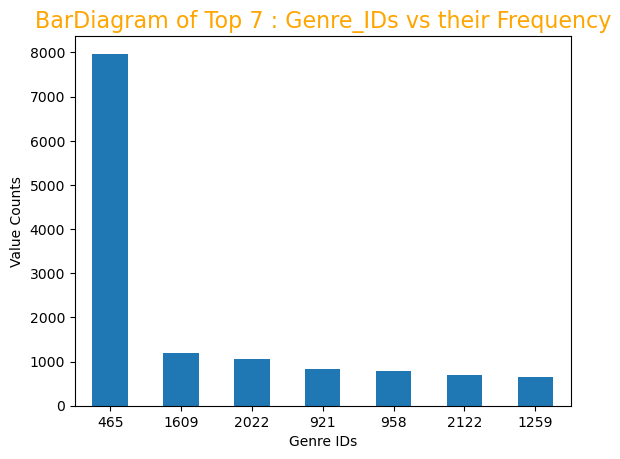

In [21]:
song_df['genre_ids'].value_counts()[:7].plot(kind='bar')
plt.xlabel('Genre IDs')
plt.ylabel('Value Counts')
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 0) # gca() returns current axes (or standalone visualization) in the current figure
plt.title("BarDiagram of Top 7 : Genre_IDs vs their Frequency",
          color="orange",
          fontsize=16);

In [22]:
song_df.isna().sum()


song_id            0
song_length        0
genre_ids        346
artist_name        0
composer        8382
lyricist       14332
language           0
dtype: int64

In [ ]:
#Filling NaNs/Missing Values with Empty String.

In [23]:
song_df['genre_ids'].fillna(' ', inplace=True)
song_df['composer'].fillna(' ', inplace=True)
song_df['lyricist'].fillna(' ', inplace=True)

song_df.isna().sum()

song_id        0
song_length    0
genre_ids      0
artist_name    0
composer       0
lyricist       0
language       0
dtype: int64

In [24]:
song_extra_info_df.isna().sum()

song_id         0
name            2
isrc       136548
dtype: int64

In [25]:
train_df.isna().sum()

msno                    0
song_id                 0
source_system_tab      67
source_screen_name    576
source_type            50
target                  0
dtype: int64

In [ ]:
#Preparing Main Dataset


In [26]:
main_df = train_df.drop(['source_system_tab', 'source_screen_name', 'source_type', 'target'], axis = 1)
main_df.head()

,msno,song_id
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=


In [27]:
## Renaming msno to user_id
main_df.rename(columns={'msno': 'user_id'}, inplace=True)
main_df.head()


,user_id,song_id
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=


In [28]:
## Merging main_df and song_df and Droping Columns

main_df = main_df.merge(song_df, on='song_id')
main_df = main_df.drop(['song_length', 'language'], axis=1)
main_df.head()


,user_id,song_id,genre_ids,artist_name,composer,lyricist
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩


In [29]:
song_extra_info_df.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [30]:
## Merging and Droping

main_df = main_df.merge(song_extra_info_df, on='song_id').drop('isrc', axis=1)
main_df.head()


,user_id,song_id,genre_ids,artist_name,composer,lyricist,name
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好


In [31]:
## Renaming 
main_df.rename(columns={'name' : 'song_name'}, inplace=True)
main_df.head()


,user_id,song_id,genre_ids,artist_name,composer,lyricist,song_name
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好


In [32]:
main_df['genre_ids'].value_counts()


465                    710
458                    400
444                     65
1609                    57
921                     49
359                     32
                        26
139                     24
2022                    21
1259                    20
2122                    13
139|125|109              7
726                      7
451                      7
437                      7
958                      6
786|947                  6
465|1259                 4
1011                     4
786                      4
947                      4
691                      3
921|465                  3
430                      3
921|458                  2
458|1287                 2
698                      2
444|1259                 2
829                      2
850                      2
1152                     1
880|458                  1
465|829                  1
864|857|850|843          1
465|798                  1
474                      1
864|850|726|857|843      1
3

In [33]:
main_df['genre_ids'] = main_df['genre_ids'].str.replace('|', ' ', regex=True)
main_df['genre_ids'].value_counts().tail()


1609 465    1
465 2122    1
423         1
726 242     1
437 850     1
Name: genre_ids, dtype: int64

In [34]:
### lets see all tuples values...
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows') 

In [35]:
main_df['artist_name'] = main_df['artist_name'].str.replace( '|',' ', regex=True)
main_df['artist_name'] = main_df['artist_name'].str.replace( '/',' ',  regex=True)

main_df['lyricist'] = main_df['lyricist'].str.replace( '|',' ', regex=True)
main_df['lyricist'] = main_df['lyricist'].str.replace( '/',' ', regex=True)

main_df['composer'] = main_df['composer'].str.replace( '|',' ', regex=True)
main_df['composer'] = main_df['composer'].str.replace( '/',' ', regex=True)


In [36]:
main_df['artist_name']  = main_df['artist_name'].str.lower()
main_df['lyricist']  = main_df['lyricist'].str.lower()
main_df['composer']  = main_df['composer'].str.lower()


In [37]:
#Creating new column song_details with values concatenating corresoponding values of attributes artist_name, composer, lyricist .

In [38]:
main_df['song_details'] = main_df['artist_name'] + ' ' +  main_df['lyricist'] + ' ' +  main_df['composer'] + ' ' +  main_df['genre_ids']
main_df.head()

,user_id,song_id,genre_ids,artist_name,composer,lyricist,song_name,song_details
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,desiigner,sidney selby adnan khan,,Panda,desiigner sidney selby adnan khan 1259
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,desiigner,sidney selby adnan khan,,Panda,desiigner sidney selby adnan khan 1259
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍 鄭建浩 鄭建浩 458
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍 鄭建浩 鄭建浩 458
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍 鄭建浩 鄭建浩 458


In [39]:
main_df.user_id.value_counts()

EozJegFxTFIWDb9aJ7O8kSUHAgx4ZIvqf7IuN5Zck50=    19
V5U4EGk2kaSKaUGSwhU6g3HBefxflEvAy1vWPu6UBQs=    18
Bwg9yS76qujJJeKsYSzfJrMlkjK5Ui7KFkgUcjuXRCg=    12
W9NYSCff57nmfyYCiX6IbW0/G3YuwC18h/rld+BGxMY=    11
UzlQoa9tdrcpYdh4wksoh+SpWCFcKvRGPA+xLNqghmo=    11
                                                ..
rb7TT328utsdnd8COyhstig0zciXIURo7M464E60EHg=     1
hSn7jMfIURFu+1W3PDIDTxbhM5SxRg9VFRoH23Rm2Ic=     1
yrMfQXudhDaA/bOePZtkKErbjZc5pALG79FHPayEy5U=     1
iP3eF1In0rH61CfgVmWVYj4CgFcQQ0iVZG7MBA+Plgo=     1
j2Sx5B7BrjqCiT3ZwWK4AvepwM14QEalhTPi2/sgdG4=     1
Name: user_id, Length: 975, dtype: int64

Computing Similarities betn Songs using Cosine_similarities.
Before the computation of Cosine Similarity, we need to remove duplicated or redundant values in song_details column which consists value append from genre_ids, artist_name, composer and lyricist. So, removing user_id from main_df and storing into temp_df. Now, temp_df consists of some duplicated tuples and we remove duplicated tuples and compute cosine_similarity.


In [40]:
main_df.duplicated().sum()


0

In [41]:
temp_df = main_df.copy() # Making duplicate of Original dataset.
temp_df.head()

,user_id,song_id,genre_ids,artist_name,composer,lyricist,song_name,song_details
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,desiigner,sidney selby adnan khan,,Panda,desiigner sidney selby adnan khan 1259
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,desiigner,sidney selby adnan khan,,Panda,desiigner sidney selby adnan khan 1259
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍 鄭建浩 鄭建浩 458
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍 鄭建浩 鄭建浩 458
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍 鄭建浩 鄭建浩 458


In [ ]:
#Computing Cosine Similarities Matrix for unique song_details values / for every unique songs with each others

In [42]:
temp_df.song_details.duplicated().sum()


876

In [43]:
temp_df.shape


(1509, 8)

In [44]:
temp_df.duplicated().sum()

0

In [45]:
temp_df.drop('user_id', axis=1) # Removing user_id from temp_df
temp_df.head()

,user_id,song_id,genre_ids,artist_name,composer,lyricist,song_name,song_details
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,desiigner,sidney selby adnan khan,,Panda,desiigner sidney selby adnan khan 1259
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1259,desiigner,sidney selby adnan khan,,Panda,desiigner sidney selby adnan khan 1259
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍 鄭建浩 鄭建浩 458
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍 鄭建浩 鄭建浩 458
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍 鄭建浩 鄭建浩 458


In [46]:
temp_df.duplicated().sum()

0

In [47]:
temp_df = temp_df.drop_duplicates()
temp_df.shape

(1509, 8)

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing tfidf vectorizer

tfidf = TfidfVectorizer(analyzer='word', stop_words='english')

# Fit and transform 

tfidf_matrix = tfidf.fit_transform(temp_df['song_details'])


In [49]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarities = cosine_similarity(tfidf_matrix)

In [50]:
cosine_similarities[:2]

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]])

In [51]:
similarities = {} ## For storing similarity matrix for every songs.

In [ ]:
#Commented lines are just for debugging and analysis purpose.


In [52]:
for i in range(len(cosine_similarities)):
    # Now we'll sort each element in cosine_similarities and get the indexes of the songs.
    
    similar_score = cosine_similarities[i]
    
#     print(similar_score)
#     print(f"Max:{max(similar_score)}")
#     print(f"Min: {min(similar_score)}")
    
    similar_indices = cosine_similarities[i].argsort()
    
#     print(f"Argsot: {similar_indices}")
#     print(f"INDEX-4328: {similar_score[4328]}")
#     print(similar_indices)
    
# Retrieving 50 index values with maximum similarity and maximum similarity index value will be from the end of similar_indices list
    similar_indices = similar_indices[:-50:-1] 
    
#     print(f"Similar INdices: {similar_indices}")
    
 # After that, we'll store in similarities each name of the 50 most similar songs.
 # Except the first one that is the same song.
    similarities[temp_df['song_name'].iloc[i]] = [(cosine_similarities[i][x], temp_df['song_name'].iloc[x], temp_df['artist_name'].iloc[x]) for x in similar_indices][1:]
   


In [53]:
# similarities

Constructing Content Based Recommendation System.


In [54]:
class ContentBasedRecommender:
    def __init__(self, similarity_matrix):
        self.similarity_mat = similarity_matrix
        self.user_history_list = main_df.groupby(['user_id'])['song_name'].apply(list)
    
    def PrintRecommendedSongs(self, song, recom_song, number_songs, user_play_list):
        print(f"Length of Possible Recommended Songs : {len(recom_song)}\n")
        print(f'The {number_songs} recommended songs are:')
        i=0
        k=0
        temp_recom_list = []
        while(i!=number_songs):
            
            if k < len(recom_song): # Handling index out of range error...
                    if recom_song[k][1] in user_play_list or recom_song[k][1] in temp_recom_list:
                        k = k+1
                    else:
                        if recom_song[k][0] != 0.0:   # Enters if similarity_score less than 0.0
                            print(f"Number {i+1}:")
                            print(f"{recom_song[k][1]} by {recom_song[k][2]} with {recom_song[k][0]} similarity score") 
                            print("--------------------")
                            temp_recom_list.append(recom_song[k][1])

                            # print(temp_recom_list)

                            i=i+1
                            k=k+1
                        else: ## Not Displaying songs with cosine_similarity score of Zero. You can customize this setting yourself.
                            print("Opps!!! No Similar Songs for Recommendations. You can go through most popular songs of this week!!!")
                            break

            else:
                print("Opps !!! There are no more similar songs!!!")
                break
        
                

            
    def user_songs_history(self, userID):
        user_history_values = self.user_history_list[userID]
        user_playlist = []
        print(f"User ID: {userID}\n\n")
        print("Songs History:\n")
        for i in range(len(user_history_values)):
            song  = user_history_values[i]
            print(f"{i+1}. {song}\n")
            user_playlist.append(song)
        return user_playlist
        
        
    def return_most_similar_song(self, song, number_songs):
         recom_song = self.similarity_mat[song][:number_songs]
         return recom_song
        
    
    
    def recommend(self, recommendation):
            # Get playlist of particular user
            user_play_list = self.user_songs_history(recommendation['userID_recom'])
            # Get number of songs to recommend
            recom_song_list = []
            number_songs = recommendation['number_songs']
            
            # Get the number of songs most similars from matrix similarities
            
            for song in user_play_list:
                 recom_song_list.extend(self.return_most_similar_song(song, number_songs))
#           print("I am Correct...")
#           print(recom_song_list)
            recom_song_list = sorted(recom_song_list, reverse=True)
            # print each item
#           print(recom_song_list)
            self.PrintRecommendedSongs(song=song,
                                       recom_song=recom_song_list,
                                       number_songs=number_songs,
                                       user_play_list=user_play_list)


In [ ]:
#Making Recommendation of Songs to user

In [56]:
recommedations = ContentBasedRecommender(similarities)

In [57]:
recommendation = {
    "userID_recom": main_df['user_id'].iloc[1],
    "number_songs": 50 
}

In [58]:
recommedations.recommend(recommendation)

User ID: hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=


Songs History:

1. Panda

Length of Possible Recommended Songs : 48

The 50 recommended songs are:
Number 1:
Tiimmy Turner by desiigner with 0.6515490831920839 similarity score
--------------------
Number 2:
Know Better by various artists with 0.20292146688765525 similarity score
--------------------
Number 3:
우리 지금 만나 Let's Meet Now (feat. 장기하와 얼굴들 Kiha & The Faces) by leessang with 0.17470303762142614 similarity score
--------------------
Number 4:
Sometimes by geeks with 0.16439075539167655 similarity score
--------------------
Number 5:
你不愛我 by 玖壹壹 with 0.15532014583627934 similarity score
--------------------
Number 6:
Turn Around [5|4|3|2|1] by flo rida with 0.15180114726504682 similarity score
--------------------
Number 7:
Where'd You Go (feat. Holly Brook & Jonah Matranga) by fort minor with 0.13409449679485735 similarity score
--------------------
Number 8:
Pull Up (feat. Lil Uzi Vert) by wiz khalifa with 0.1340944967948

# Thank You